# 👀 Multilayer perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [1]:
#!pip install tensorflow
#!pip install matplotlib
#!pip install setuptools
#!pip install --upgrade pip setuptools wheel
#!pip install --upgrade tensorflow matplotlib
#!pip install -U tensorflow-addons
#!pip install --upgrade pip setuptools wheel
#!pip install tensorflow matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display

## 0. Parameters <a name="parameters"></a>

In [3]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [13]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [15]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [16]:
# Normalização dos dados de entrada (imagens)
# Convertemos para float32 e dividimos por 255 para ter valores entre 0 e 1
x_train = x_train.astype("float32") / 255.0  # Dados de treino
x_test = x_test.astype("float32") / 255.0    # Dados de teste

# Conversão das labels para one-hot encoding
# Ex: label 2 vira [0,0,1,0,0,0,0,0,0,0] 
y_train = utils.to_categorical(y_train, NUM_CLASSES)  # Labels de treino
y_test = utils.to_categorical(y_test, NUM_CLASSES)    # Labels de teste

In [18]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [17]:
x_train[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [19]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [20]:
# O shape (32, 32, 3) indica que cada imagem tem:
# - 32 pixels de altura
# - 32 pixels de largura  
# - 3 canais de cores (RGB - vermelho, verde e azul)
x_train[0].shape


(32, 32, 3)

## 2. Build the model <a name="build"></a>

In [31]:
# layers.Input cria uma camada de entrada para a rede neural
# Especifica o formato dos dados que a rede vai receber:
# - 32 pixels de altura
# - 32 pixels de largura
# - 3 canais de cores (RGB)
input_layer = layers.Input((32, 32, 3))
input_layer

<KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=False, name=keras_tensor_3>

In [32]:
# Criando a camada de entrada que recebe imagens 32x32 com 3 canais de cores
input_layer = layers.Input((32, 32, 3))

# Transformando a imagem 3D em um vetor 1D (flatten)
x = layers.Flatten()(input_layer)

# Primeira camada densa com 200 neurônios e função de ativação ReLU
x = layers.Dense(200, activation="relu")(x)

# Segunda camada densa com 150 neurônios e função de ativação ReLU 
x = layers.Dense(150, activation="relu")(x)

# Camada de saída com 10 neurônios (um para cada classe) e softmax para probabilidades
output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

# Criando o modelo conectando a entrada à saída
model = models.Model(input_layer, output_layer)

# Mostrando um resumo da arquitetura do modelo
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Train the model <a name="train"></a>

In [33]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [34]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2910 - loss: 1.9631
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3921 - loss: 1.6921
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4337 - loss: 1.5918
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4532 - loss: 1.5283
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4633 - loss: 1.4931
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4778 - loss: 1.4622
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4894 - loss: 1.4228
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5048 - loss: 1.3981
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5092 - loss: 1.3796
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5132 - loss: 1.3675


## 4. Evaluation <a name="evaluate"></a>

In [35]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4997 - loss: 1.4087


[1.4115816354751587, 0.49970000982284546]

In [36]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [48]:
display(preds[0])
display(np.argmax(preds[0]))

array([0.01755732, 0.02156187, 0.02344639, 0.49950144, 0.08227228,
       0.20801073, 0.06642825, 0.00744151, 0.06911303, 0.00466716],
      dtype=float32)

3

In [45]:
display(preds_single[0:10])
display(actual_single[0:10])


array(['cat', 'truck', 'ship', 'ship', 'deer', 'frog', 'cat', 'frog',
       'deer', 'automobile'], dtype='<U10')

array(['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile',
       'frog', 'cat', 'automobile'], dtype='<U10')

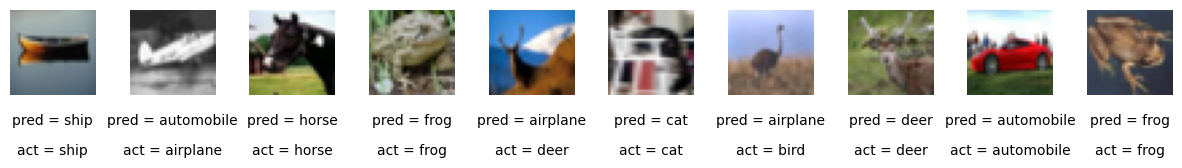

In [46]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)